In [54]:
# Importing libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv('D:\DATA ANALYTICS\project\\books.csv')

# 1) Overview of dataset

In [3]:
# Looking at the overview of the dataset

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# Shape of the dataset

print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 550 records and 7 columns.


In [5]:
# Data type for each columns

df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
# Changing 'Genre' column datatype from object to category type for visualization purposes later

df['Genre'] = df['Genre'].astype('category')

# 2) Data cleaning

In [7]:
# looping through the columns to detect missing values

for col in df.columns:
    percent_missing = df[col].isnull().mean()
    print(f'{col} - {percent_missing :.1%}')

Name - 0.0%
Author - 0.0%
User Rating - 0.0%
Reviews - 0.0%
Price - 0.0%
Year - 0.0%
Genre - 0.0%


In [8]:
# Determining non-numerical columns

non_numeric_colname = df.select_dtypes(exclude=['Int64', 'Float64'])
print(f'Сolumns without numeric data: {", ".join(non_numeric_colname)}.')

Сolumns without numeric data: Name, Author, Genre.


In [9]:
# Checking duplicates in the three columns
for col in non_numeric_colname:
    if df[col].duplicated().any():
        print (f'Column {col} contains duplicates.')
    else:
        print (f'Column {col} does not contain duplicates.')

Column Name contains duplicates.
Column Author contains duplicates.
Column Genre contains duplicates.


In [10]:
# Checking for spelling erros 

for col in non_numeric_colname:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 351 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2


In [11]:
# Correcting the errors found in Name column

df['Name'] = df['Name'].str.title().str.strip()

In [12]:
# Rechecking for spelling erros 
for col in non_numeric_colname:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2


In [13]:
#Checking unique author names to see if they're mispelled

authors = df.Author.sort_values().unique()
authors 

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [14]:
# Only 2 authors are spelled differently (George R.R. Martin and J.K. Rowling)

df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [15]:
# Rechecking 
for col in non_numeric_colname:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 246 After Author: 246
Before Genre: 2 After Genre: 2


In [16]:
#Checking unique Genre to see if they're mispelled

genres = df.Genre.unique()
genres

['Non Fiction', 'Fiction']
Categories (2, object): ['Non Fiction', 'Fiction']

In [17]:
#Checking Years to see if they're mispelled

years = df.Year.sort_values().unique()
years

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

# 3) Data Visualization

### 3.1) Top 10 Authors

In [18]:
# Assigning to a new dataframe by average rating of authors

top_10_authors = df.groupby('Author')[['User Rating']].mean()\
                                                              .sort_values('User Rating', ascending=False)\
                                                              .head(20)\
                                                              .reset_index()

In [53]:
fig_1 = make_subplots(rows=1, cols=1, subplot_titles=("")) 


# Setting table parameters
fig_1.add_trace(go.Table(columnorder = [1,2],
                         columnwidth = [35,35],
                         header=dict(values=top_10_authors.columns, 
                                     line_color='black',
                                     fill_color='mediumaquamarine',
                                     height=30),
                         cells=dict(values=[top_10_authors['Author'],
                                    top_10_authors['User Rating']], 
                                    line_color='black',
                                    fill_color='White')))

# Setting the parameters of the chart when displaying
fig_1.update_layout(showlegend=False, 
                    title_text='Top 10 best authors', 
                    title_font_size=25, 
                    title_font_family='Arial Rounded MT Bold', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_1.show()

### 3.2) Counts of book genre (Non-Fiction and Fiction)

In [20]:
# Assigning to a new dataframe by counts of genre

number_of_books_by_genre = df.groupby('Genre')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

In [50]:
# Let's set the visualization parameters
fig_2 = make_subplots(rows=1, cols=1)

# Setting table parameters
fig_2.add_trace(go.Pie(values=number_of_books_by_genre['Name'],
                       labels=['Non Fiction', 'Fiction'],
                       textinfo='label+percent',
                       insidetextorientation='radial',
                       hole=0.3,
                       marker=dict(colors=['Gray','mediumaquamarine'], 
                                   line_color='Gray', 
                                   line_width=1),
                       textfont={'color': 'azure', 'size': 17},
                       textfont_size=17))

# Setting the parameters of the chart when displaying
fig_2.update_layout(margin_t=50, 
                    showlegend=False, 
                    title_text='Count of books genre', 
                    title_x=0.5, 
                    font=dict(family='Arial', 
                              size=15, 
                              color='black'))

# Displaying the graph
fig_2.show()

### 3.3) Top 10 authors by number of bestseller

In [22]:
number_of_books_written = df.groupby('Author')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

In [23]:
# Let's set the visualization parameters
fig_3 = make_subplots(rows=1, cols=1,
                      subplot_titles=(""))

# Setting Bar parameters
fig_3.add_trace(go.Bar(x=number_of_books_written['Author'], 
                       y=number_of_books_written['Name'],
                       name ='Book Counts',
                       marker_color=['#148F77','#1ABC9C', '#1ABC9C', '#1ABC9C', '#48C9B0',
                                     '#76D7C4', '#76D7C4', '#A3E4D7', '#D1F2EB', '#E8F8F5 ']),
                       row=1, col=1)

# Setting the parameters of the chart when displaying
fig_3.update_traces(marker_line_width=0)

# Setting the parameters of the chart when displaying
fig_3.update_layout(showlegend=False, 
                    #plot_bgcolor='rgba(1,1,1,1)',
                    font=dict(family='Arial', 
                              size=15,
                              color='black'),
                    title_text='Top 10 authors by number of bestsellers', 
                    title_x=0.5)

### 3.4) Top books by number of reviews

In [24]:
# We take books with the number of reviews
books_with_the_number_of_reviews = df.groupby('Name')[['Reviews']].sum()\
                                                                           .sort_values('Reviews', ascending=False)\
                                                                           .head(5)\
                                                                           .reset_index()

In [45]:
# Let's set the visualization parameters
fig_4 = make_subplots(rows=1, cols=1,
                      subplot_titles=(""))

# Setting Bar parameters
fig_4.add_trace(go.Bar(x=books_with_the_number_of_reviews['Name'], 
                       y=books_with_the_number_of_reviews['Reviews'],
                       marker_color=['#148F77','#1ABC9C', '#76D7C4', '#A3E4D7', '#E8F8F5'],
                       name ='Reviews'),
                       row=1, col=1)

# Setting the parameters of the chart when displaying
fig_4.update_traces(marker_line_width=0)

# Setting the parameters of the chart when displaying
fig_4.update_layout(showlegend=False, 
                    #plot_bgcolor='rgba(1,1,1,1)',
                    font=dict(family='Arial', 
                              size=12,
                              color='black'),
                    title_text='Top 5 books by number of reviews', 
                    title_x=0.2)
# Displaying the graph
fig_4.show()

### 3.5) Correlation heatmap

In [27]:
# Categorizing non-numeric variables to unique value

df1 = df

for col_name in df1.columns:
    if (df1[col_name].dtype == 'object'):
        df1[col_name] = df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes
df1.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,0,112,4.7,17350,8,2016,Non Fiction
1,1,217,4.6,2052,22,2011,Fiction
2,2,132,4.7,18979,15,2018,Non Fiction
3,3,95,4.7,21424,6,2017,Fiction
4,4,172,4.8,7665,12,2019,Non Fiction


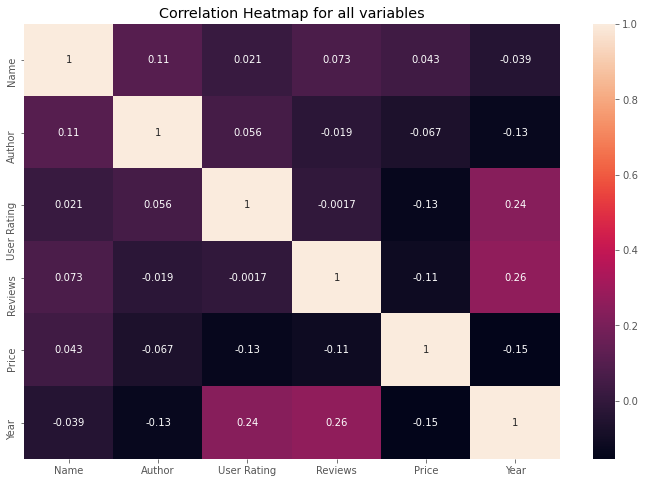

In [44]:
# Heatmap of non-numeric and numeric data

corr_matrix = df1.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap for all variables')
plt.show()

In [ ]:
pip install -U pip
pip uninstall kaleido
pip install kaleido==0.0.1
pip --version